In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
train_df = pd.read_csv("/content/dataset.csv")
test_df=pd.read_csv("/content/test.csv")

In [3]:
train_df.sample(10)

,labels,text
23494,pl,Dwie krowy stojące na dużym polu.
18158,es,"Es muy cómodo y funciona bien, nada pesado y d..."
34149,tr,Bu duygular nasıl oluşturulur ben izah edemiyo...
61748,pt,As reservas de austos abrem mais abaixo
52201,vi,"Ung thư phổi cardiopulmonary tử vong , và sự p..."
39973,es,"Hay gente que le gusta el Fifa, otros que le g..."
32455,el,Ώρες γεύματος
55873,ur,فرض کیا جا رہا ہے کہ آپ کو ہیڈکوارٹرز کی جانب ...
1788,ru,"И я думаю , что я понимаю , что это не столько..."
30763,el,Συζητώντας το άρθρο του περιοδικού Sat prep στ...


In [4]:
# Determine the name of the columns
print(train_df.columns)

Index(['labels', 'text'], dtype='object')


In [5]:
# Check for missing values in the dataframe
train_df.isnull().sum()

labels    0
text      0
dtype: int64

In [6]:
# Get the data type of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  70000 non-null  object
 1   text    70000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
train_df.describe()

,labels,text
count,70000,70000
unique,20,68978
top,pt,Um homem está a tocar guitarra.
freq,3500,18


The languages are:
arabic (ar), bulgarian (bg), german (de), modern greek (el), english (en), spanish (es), french (fr), hindi (hi), italian (it), japanese (ja), dutch (nl), polish (pl), portuguese (pt), russian (ru), swahili (sw), thai (th), turkish (tr), urdu (ur), vietnamese (vi), and chinese (zh)

In [8]:
# Determine the number of values for each language
train_df['labels'].value_counts()

labels
pt    3500
bg    3500
en    3500
vi    3500
fr    3500
nl    3500
el    3500
de    3500
hi    3500
it    3500
ar    3500
es    3500
tr    3500
sw    3500
ur    3500
pl    3500
ru    3500
th    3500
zh    3500
ja    3500
Name: count, dtype: int64

**Text Preprocessing:**

In [9]:
#Lowercase the text
train_df['text']= train_df['text'].str.lower()
test_df['text']=test_df['text'].str.lower()
train_df

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,он увеличил давление .
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...
69996,el,"ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτ..."
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...
69998,es,se me rompió uno al sacarlo del cargador. cali...


In [10]:
# Remove the HTML tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

train_df['text']=train_df['text'].apply(remove_html_tags)
test_df['text']=test_df['text'].apply(remove_html_tags)
train_df

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,он увеличил давление .
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...
69996,el,"ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτ..."
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...
69998,es,se me rompió uno al sacarlo del cargador. cali...


In [11]:
# Remove URLs
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

train_df['text']=train_df['text'].apply(remove_url)
test_df['text']=test_df['text'].apply(remove_url)
train_df

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,он увеличил давление .
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...
69996,el,"ναι , ξέρω ένα που είναι ακόμα έτσι , αλλά αυτ..."
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...
69998,es,se me rompió uno al sacarlo del cargador. cali...


In [12]:
import string
# Define the punctuation characters to remove
exclude = set(string.punctuation)

# Function to remove punctuation from text
def remove_punctuation(text):
    return ''.join(ch for ch in text if ch not in exclude)

# Apply the function to the 'text' column
train_df['text'] = train_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_punctuation)
train_df


,labels,text
0,pt,os chefes de defesa da estónia letónia lituâni...
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,он увеличил давление
...,...,...
69995,ja,本格的なゲーミングヘッドホンでした。 今まで使ってた1万円するパナソニックのヘッドホンは何だ...
69996,el,ναι ξέρω ένα που είναι ακόμα έτσι αλλά αυτό ...
69997,ur,اور مجھے اس ملک کے بارے میں معلوم نہیں ہے کہ گ...
69998,es,se me rompió uno al sacarlo del cargador calid...


In [13]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
train_df['text']=train_df['text'].apply(word_tokenize)
test_df['text']=test_df['text'].apply(word_tokenize)
train_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,labels,text
0,pt,"[os, chefes, de, defesa, da, estónia, letónia,..."
1,bg,"[размерът, на, хоризонталната, мрежа, може, да..."
2,zh,[很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就...
3,th,"[สำหรับ, ของเก่า, ที่, จริงจัง, ลอง, honeychur..."
4,ru,"[он, увеличил, давление]"
...,...,...
69995,ja,"[本格的なゲーミングヘッドホンでした。, 今まで使ってた1万円するパナソニックのヘッドホンは..."
69996,el,"[ναι, ξέρω, ένα, που, είναι, ακόμα, έτσι, αλλά..."
69997,ur,"[اور, مجھے, اس, ملک, کے, بارے, میں, معلوم, نہی..."
69998,es,"[se, me, rompió, uno, al, sacarlo, del, cargad..."


**Numerical Representation of Text and Labels:**




In [14]:
# TF- IDF representation of the text
from sklearn.feature_extraction.text import TfidfVectorizer

#Convert the review from a list to a string format
train_df['text'] = train_df['text'].apply(' '.join)
test_df['text'] = test_df['text'].apply(' '.join)


In [15]:
# Fit the TF-IDF vectorizer on the training data and transform both train and test data
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(train_df['text'])
x_test = tfidf.transform(test_df['text'])

In [16]:
# Use Label encoder to encode the 'labels' column of both the train and test data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_df['labels'])
y_test = le.transform(test_df['labels'])

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70000, 188025)
(70000,)
(10000, 188025)
(10000,)


In [18]:
print(x_train)

  (0, 13949)	0.19907863950637458
  (0, 28001)	0.2443949679665915
  (0, 57040)	0.2443949679665915
  (0, 28698)	0.253955832559901
  (0, 55682)	0.22618688208344406
  (0, 2952)	0.19393222184922887
  (0, 6981)	0.270300238537246
  (0, 25725)	0.270300238537246
  (0, 25768)	0.2443949679665915
  (0, 37959)	0.23483410337328192
  (0, 4211)	0.23483410337328192
  (0, 44754)	0.270300238537246
  (0, 44022)	0.270300238537246
  (0, 26160)	0.2607393739439365
  (0, 18292)	0.11401106630198524
  (0, 19114)	0.2198374924198834
  (0, 18843)	0.0777208243879586
  (0, 14324)	0.2607393739439365
  (0, 54750)	0.1484473437546373
  (1, 62)	0.15116011317114222
  (1, 114237)	0.1678304240059417
  (1, 105564)	0.13903895292378682
  (1, 121617)	0.4796972384889354
  (1, 106740)	0.21687735711506548
  (1, 40738)	0.34495090288556907
  :	:
  (69998, 58609)	0.1321533545777103
  (69998, 59329)	0.15401767833220995
  (69998, 44891)	0.12345475164885716
  (69998, 43307)	0.1394233714912628
  (69998, 4082)	0.13808189225802178
  (69998,

In [19]:
print(y_train)

[12  1 19 ... 17  5  7]


**Model Building:**

In [20]:
# Import the XGBoost classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)



In [21]:
# Train the XGBoost classifier on the training data
xgb_clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_clf.predict(x_test)



In [22]:
# Evaluate the XGBoost classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb}')



Accuracy: 0.8845


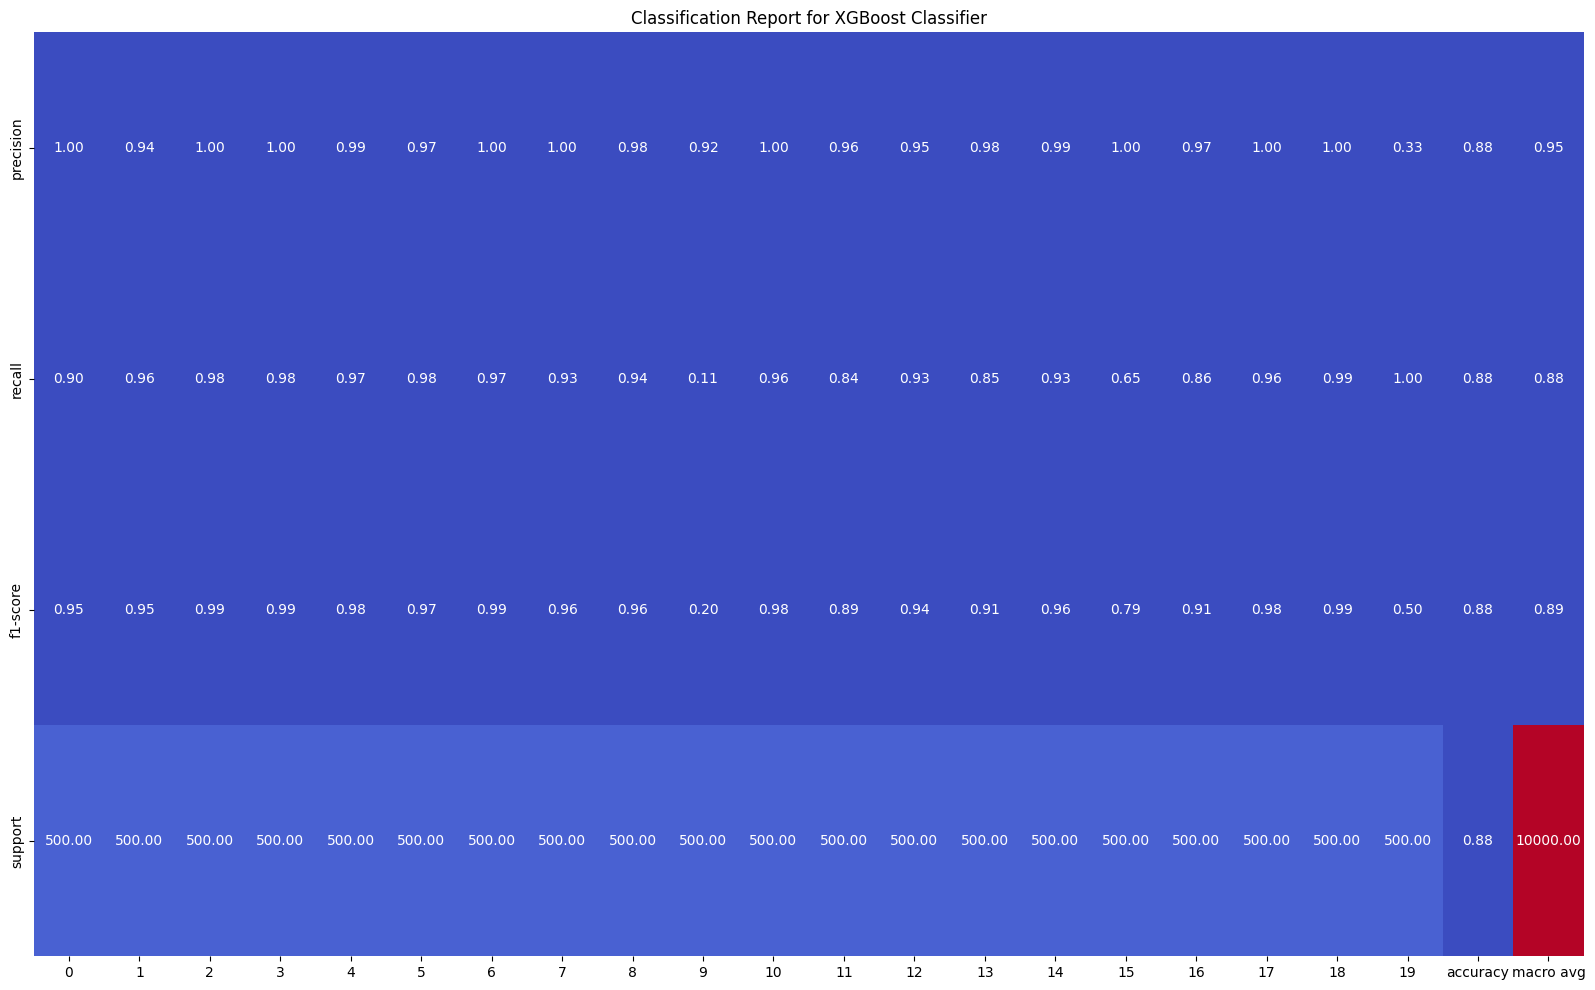

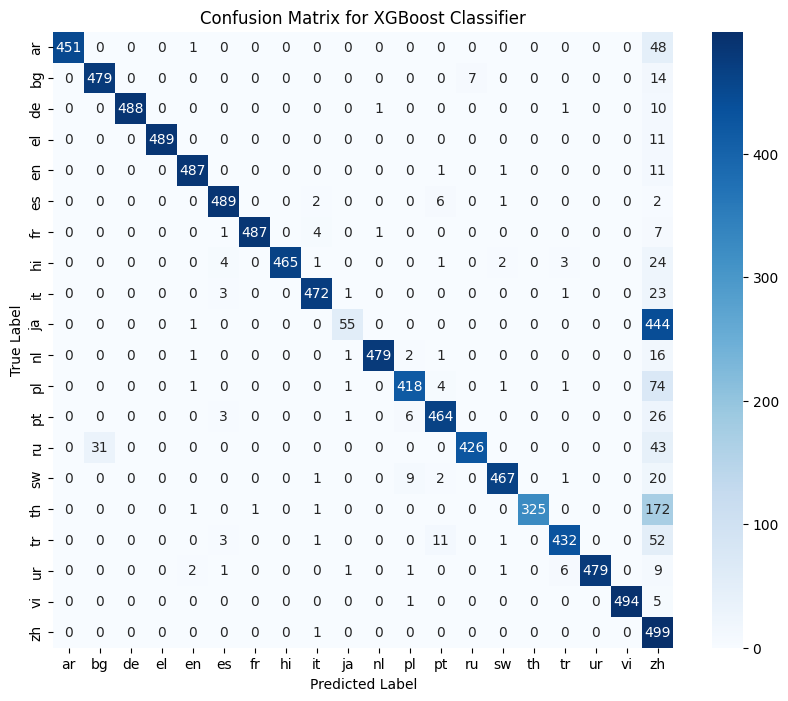

In [23]:
# Classification Report
classification_report_dict = classification_report(y_test, y_pred_xgb, output_dict=True)
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Plot the Classification Report
plt.figure(figsize=(20, 12))
sns.heatmap(classification_report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False, fmt='.2f')
plt.title('Classification Report for XGBoost Classifier')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()


In [24]:
import pickle

# Save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(xgb_clf, open(filename, 'wb'))


# Save TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save Label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

